# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Load Data

In [2]:
train = pd.read_csv('data/train.csv')

test = pd.read_csv('data/test.csv')

target =train['SalePrice'] 
train = train.drop('SalePrice', axis = 1)

In [3]:
#target_log = np.log1p(target)
#print(target_log)
train.shape

(1024, 80)

In [4]:
test.shape

(436, 80)

We are joining both the train and test datasets so that we don't have to do cleaning process for test data again.

In [5]:
data = pd.concat([train, test], ignore_index = True)

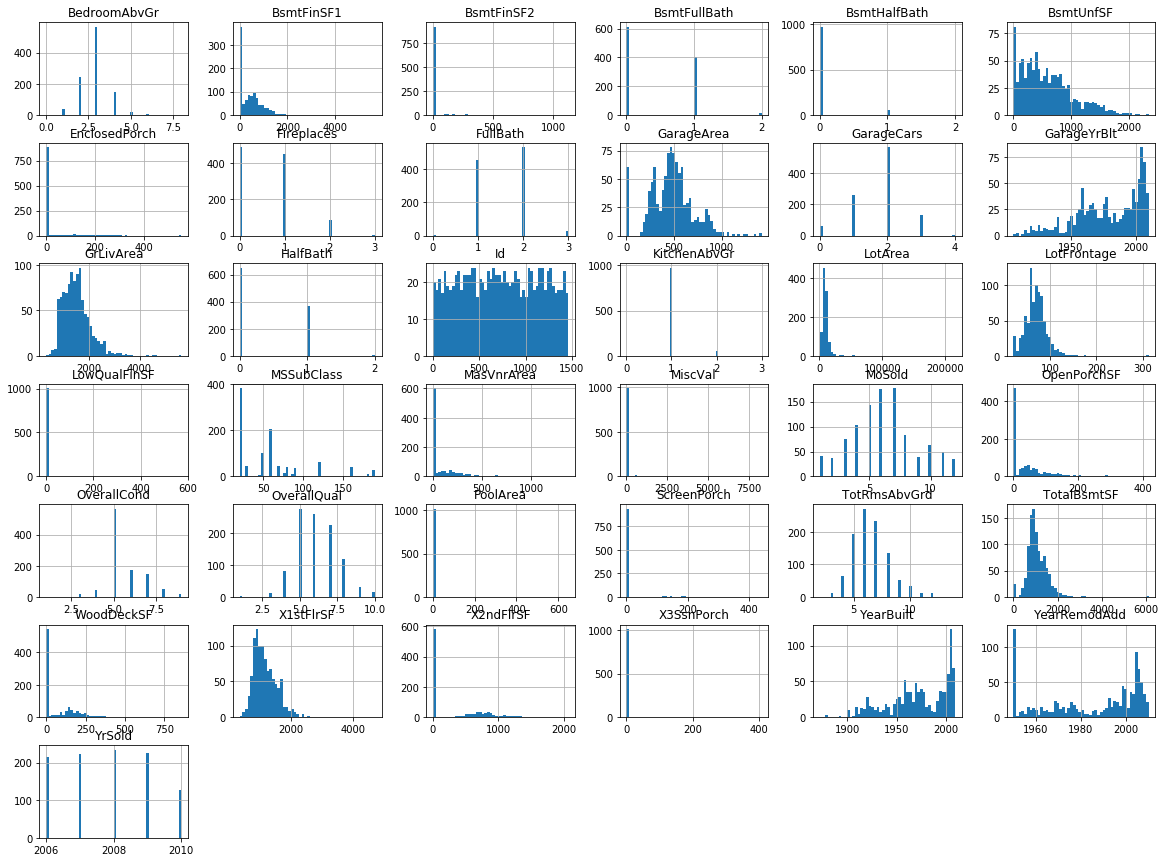

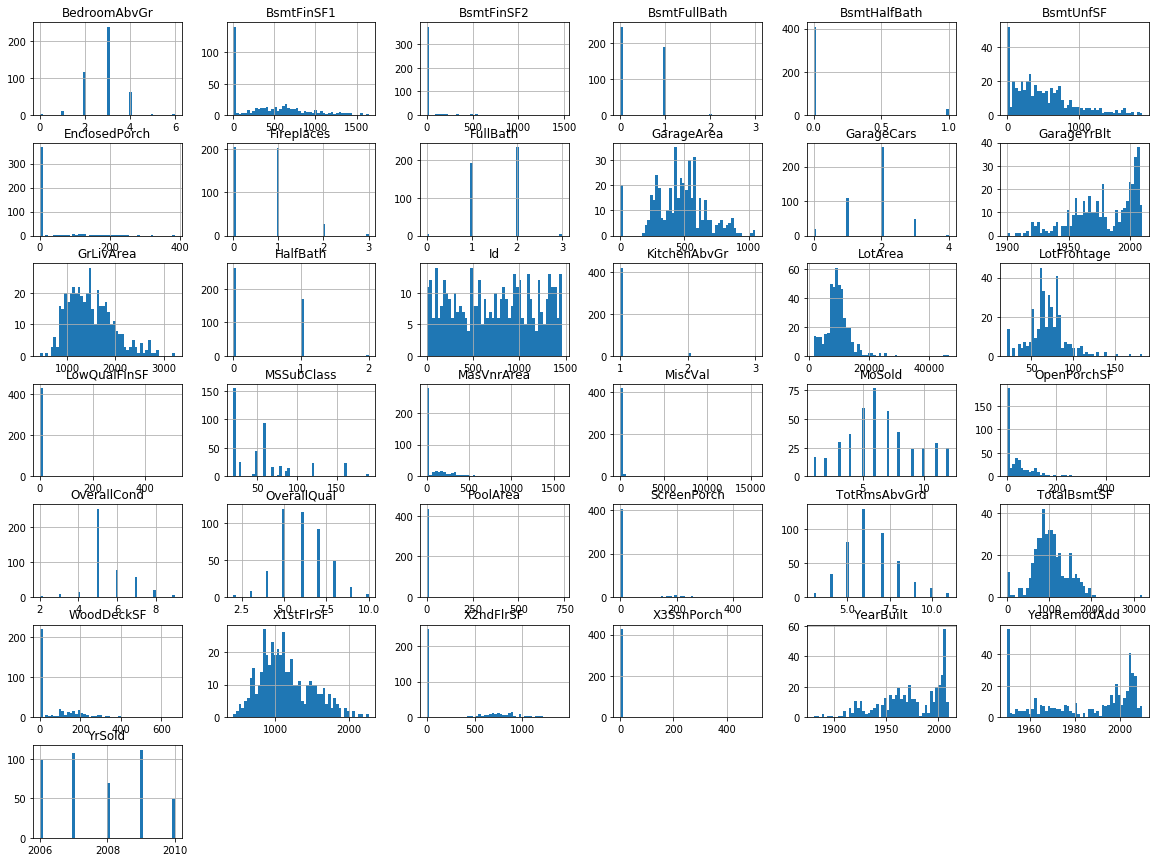

In [6]:
%matplotlib inline
train.hist(bins = 50, figsize=(20,15))
test.hist(bins = 50, figsize=(20,15))
plt.show()

In [7]:
# separate Numeric and Categorical Data

cat_col = [col for col in data.columns.values if data[col].dtype == 'object']

In [8]:
data_cat = data[cat_col]

In [9]:
data_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml


In [10]:
data_num = data.drop(data_cat, axis = 1)

In [11]:
data_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
1,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
2,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
3,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,636,255,57,0,0,0,0,0,8,2007
4,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,468,90,0,205,0,0,0,0,4,2008


#Handle Missing Numeric Values. We are dropping columns that have more than 50 missing values.

In [12]:
for col in data_num.columns.values:
    
    missing_values = data_num[col].isnull().sum()
    
    if(missing_values > 50):
        
        data_num = data_num.drop(col, axis = 1)
    else:
        
        data_num = data_num.fillna(data_num[col].median())
        

In [13]:
data_num.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,187.211986,10516.828082,6.099315,5.575342,1971.267808,1984.865753,107.119863,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,253.340503,9981.264932,1.382997,1.112799,30.202904,20.645407,186.407441,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,74.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,98.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,168.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,730.500000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [14]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
X1stFlrSF        1460 non-null int64
X2ndFlrSF        1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [15]:
#Handle Missing Categorical Values

for col in data_cat.columns.values:
    
    missing_values = data_cat[col].isnull().sum()
    
    if missing_values > 50 :
        
        data_cat = data_cat.drop(col, axis = 1)
        
        print('dropping columns', col)
    else:
        pass

dropping columns Alley
dropping columns FireplaceQu
dropping columns GarageType
dropping columns GarageFinish
dropping columns GarageQual
dropping columns GarageCond
dropping columns PoolQC
dropping columns Fence
dropping columns MiscFeature


In [16]:
data_cat.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1422,1460,1460,1460,1459,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,6,6,5,2,5,4,7,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1256,1428,741,1365,1334,735,1360,1340,1267,1198


In [17]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422 non-null object
BsmtFinType1     14

In [18]:
dummy = pd.get_dummies(data_cat)

In [19]:
dummy.shape

(1460, 215)

In [20]:
data_num.shape

(1460, 37)

In [21]:
data = pd.concat([data_num, dummy], axis = 1)
data.shape

(1460, 252)

# Split cleaned Data into training and testing

In [22]:
x_train = data.iloc[:len(train)]
x_train.shape

(1024, 252)

In [45]:
x_test = data.iloc[len(train):]
x_test.shape

(436, 252)

In [24]:
clf = LinearRegression()

In [25]:
model = clf.fit(x_train, target)

In [26]:
scores = cross_validation.cross_val_score(model, x_train, target, cv=10)
scores

array([ 0.89245942,  0.85201842,  0.90299798,  0.57043578,  0.91125311,
        0.63178735,  0.86641979,  0.87334118,  0.39232496,  0.92921796])

In [27]:
print("Accuracy: %1.3f (+/- %1.3f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.782 (+/- 0.349)


In [28]:
y_pred = model.predict(x_test)

In [29]:
y_pred

array([ 206496.03421046,  203655.05640324,  168169.7727142 ,
        214240.43806943,  116395.08825815,  148317.41005284,
        127575.74468475,  114028.07882856,  118144.1792091 ,
        305755.43268683,  212277.88006778,   83926.64527749,
        147039.70262672,  174748.95863745,  306798.86816125,
        282408.67172138,  239178.0299112 ,  140525.29207858,
        113911.43104583,   98997.76430835,  110710.38765973,
        198268.42571409,  190379.28088892,  246638.42135978,
         60892.41125332,  101460.77487911,   97083.73264399,
        105720.85354736,  182692.2732076 ,   45303.04125207,
        127208.23809589,  107853.12609667,  113394.69114355,
        157427.63267456,  201210.4778829 ,  195439.28440023,
        218963.64803477,  103615.55574373,  121990.8008418 ,
        103494.64019518,  363879.62528479,  234813.78276523,
        116318.58391546,   45958.31641762,   83536.5553922 ,
         62647.51596162,  143335.99447367,  246578.47878904,
        135521.69206593,

In [30]:
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(x_train, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
score = cross_validation.cross_val_score(random_forest_model, x_train, target, cv=10)
score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


array([ 0.01691729,  0.02040816,  0.03539823,  0.01369863,  0.        ,
        0.03703704,  0.        ,  0.        ,  0.        ,  0.        ])

In [32]:
print("Accuracy: %1.3f (+/- %1.3f)" % (scores.mean(), scores.std()*2))

pred = random_forest_model.predict(x_test)

pred

Accuracy: 0.782 (+/- 0.349)


array([223500, 180000, 134900, 190000, 119000, 110000, 155000, 132500,
       105500, 220000, 130000,  68400, 144000, 145000, 277500, 240000,
       232000, 129500, 141000,  81000,  98300, 174000, 190000, 222500,
       107900, 124500,  83500, 105000, 174000, 135000, 124000, 109500,
       160000, 132000, 128000, 231500, 226000, 129500, 118858, 124000,
       424870, 110000, 139900, 256000, 127000,  99900, 139950, 200000,
       142600, 140200, 105000,  96500, 141000, 426000, 178000, 105000,
       176000, 105000, 225000, 188700, 135000, 135000, 173000, 204000,
       148500, 372402, 155000,  88000,  87000, 176000,  67000, 155000,
       215200, 149500, 149000, 192000, 178000, 230000,  88000, 236000,
        83000, 179600, 117000, 128950, 275000, 130000, 213000, 112500,
       182900, 227875, 155000, 145000, 171900, 155000, 230000, 236000,
       239000, 377500,  95000, 161000, 183500, 190000, 263000, 180000,
       213250, 255000, 235000,  90000, 106500, 160000, 556581, 266000,
      

In [48]:
#Saving Submission file
submission = pd.DataFrame()

submission['id'] = x_test['Id']
submission['SalePrice'] = y_pred
submission.to_csv('submission.csv', index = False)